# Support Vector Machine (SVM)
#### Simple rules for Support Vector Machines
1. Choose the Right Kernel
    - The kernel function determines how data is transformed into a higher-dimensional space
        - Use a linear kernel for linearly separable data.
        - Use a non linear kernls (e.j., RBF, Polynomial) for complex, non linear data
    - Experiment with different kernels to find the best fit for your dataset

2. Maximize the margin
    - SVMs aim to fin the hyperplane that maximizes the margin between classes.
    - The margin is the distance betweeen the hyperplane and the nearest data points (support vectors)
    - A larger margin generally leads to better generalization

3. Regularization parameter ($C$)
    - The $C$ parameter controls the trade-off between maximizing the margin and minimizing classification errors.
        - A small $C$ allows to wider margin but may misclassify some points.
        - A large $C$ penalizes misclassifications more heavily, leading to a narrowe margin.
    - Tune $C$ using *cross-validation* to find the optimal value

4. Scale data
    - SVMs are sensitive to the scale of input features
    - Always standardize or normalize data (e.g., zero mean and unit variance) to ensure consistent performance

5. Handle imbalanced data
    - For imbalanced datasets, use class weights to give more importance to the minority class
    - In example `scikit-learn`> set `class_weight` > `balanced` or assign custom weights

6. Use vectors wisely
    - Support vectors are the data points closest to the hyperplane and determine its position
    - Focus on these points when interpreting the model or debugging

7. Avoid overfitting
    - Use regularization $C$ to control complexity
    - Avoid using overly complex kernels unless necessary

8. Evaluate performance
    - Use cross-validation to assess the model performance
    - For *classification*: recall, f1-score, etc
    - For *regression*: MSE or $R^{2}$

9. Start simple and scale up
    - Begin with a linear kernel and simple configurations
    - Gradually introduce complexity 


### 1. Overview
The next dataset provide us with a data about breast cancer, the main challenge is classifying tumors as either malignant or benign 

Our task here is going to be use Support Vector Machines (SVMs), to classify these tumors.

- *id*: unique ID
- *diagnosis*: M - malignant, B - benign

### 2. Libraries and dataset

In [369]:
# basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# models 
from sklearn.svm import SVC, NuSVC, LinearSVC # Support Vector Classifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# metrics
from sklearn.model_selection import cross_val_score, LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score



In [308]:
breast_cancer = r"C:\Users\super\OneDrive\Escritorio\Vasudeva\Courses\ML Self Training\datasets\breast-cancer.csv"
data = pd.read_csv(breast_cancer)

### 3. Data preprocessing and visualization

In [309]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [310]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [312]:
data.duplicated().sum()

np.int64(0)

In [313]:
data.drop(['id'], axis=1, inplace=True)

In [314]:
(data == 0 ).any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se                True
concave points_se           True
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_di

### 4. Visualization

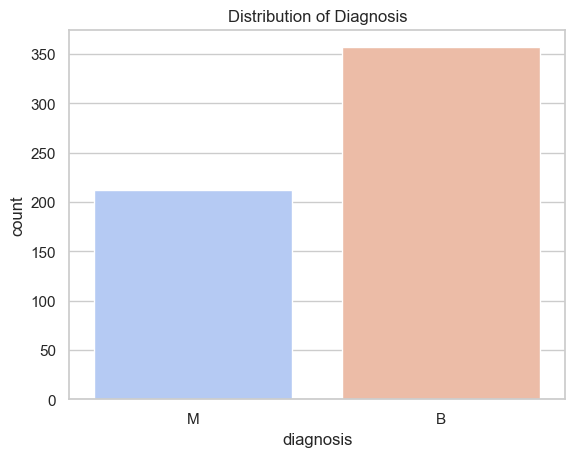

In [315]:
sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette='coolwarm')
plt.title('Distribution of Diagnosis')
plt.show()

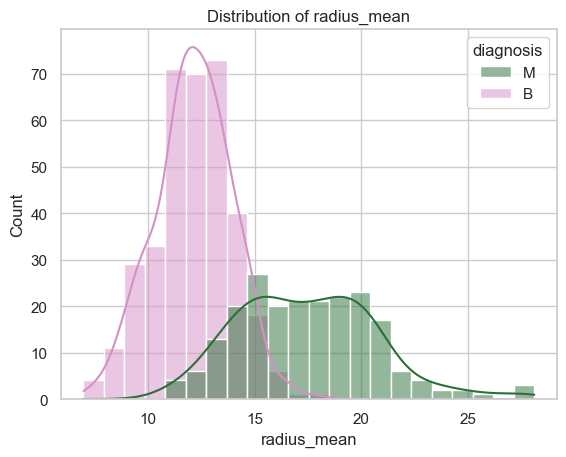

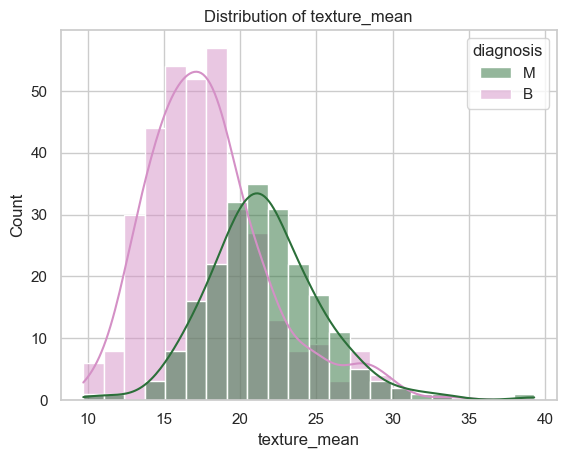

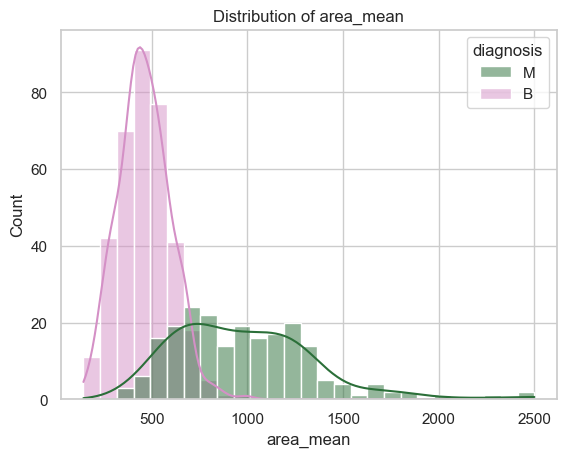

In [316]:
for feature in ['radius_mean', 'texture_mean', 'area_mean']:
    sns.histplot(data, x=feature, hue='diagnosis',
                 kde=True, palette='cubehelix')
    plt.title(f'Distribution of {feature}')
    plt.show()

    

In [317]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


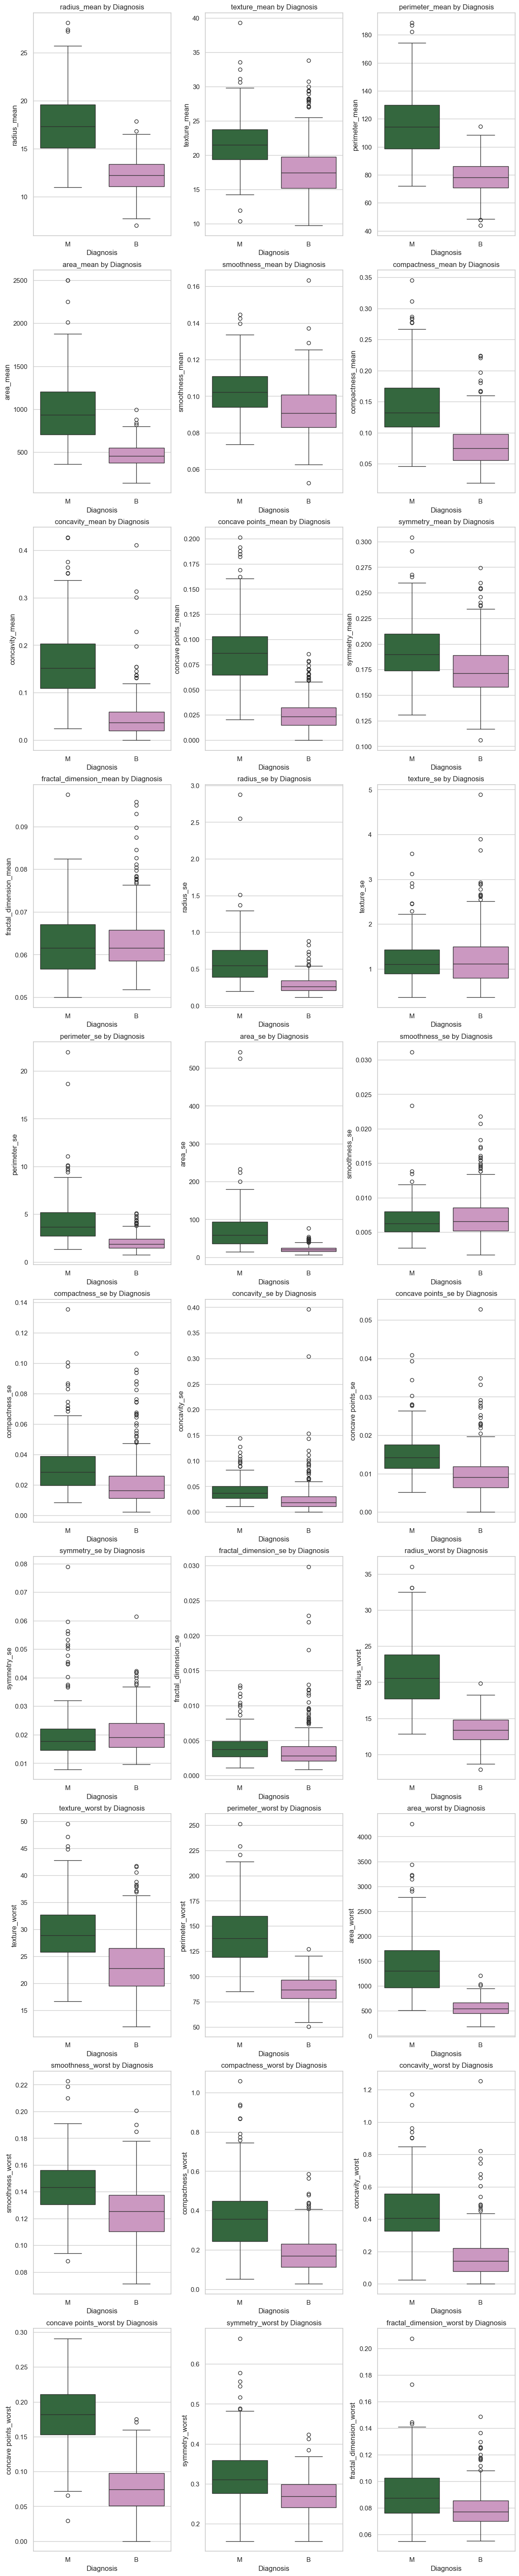

In [318]:
columns = tuple(col for col in data.columns if col!= 'diagnosis') # exclude diagnosis


n_rows =(len(columns) // 3) + (1 if len(columns) % 3 != 0 else 0)
fig, axs = plt.subplots(n_rows, 3, figsize=(12, len(columns)*2), layout='constrained')
axs = axs.flatten()

def boxplots(ax, column):
    sns.boxplot(x='diagnosis',
                y=column,
                data=data,
                hue='diagnosis',
                palette='cubehelix',
                ax=ax)

    ax.set_title(f"{column} by Diagnosis")
    ax.set_xlabel("Diagnosis")
    ax.set_ylabel(column)

for i, column in enumerate(columns):
    boxplots(axs[i], column)

# empty graphics out
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.show()


In [319]:
noise = data[(data['area_se'] > 500)]
noise


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


The area is a result of a operation that involves the perimeter so, I'll drop these two indexes.

In [320]:
data.drop(index=[212, 461], inplace=True)

In [321]:
data.shape

(567, 31)

Noises detected and removed

In [322]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [323]:
data_corr = pd.get_dummies(data, columns=['diagnosis'], drop_first=True)

In [324]:
data_corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [325]:
# change diagnosis column to 1 if M and 0 if B
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
X = data.drop(['diagnosis'], axis=1)
y = data[['diagnosis']].values.reshape(-1, 1)

In [326]:
print(y[:10])

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=.25, random_state=42)

### Ready to work!!!!

### 4. SVMs
#### SVM (classic)
The objetive of SVM is to find an hyperplane that separates the two classes with the higher margin possible.

The margin is the distance between the hyperplane and their nearest data points of each class (called **support vectors**).

**Decision hyperclasses**

The hyperclass is defined:
$$ \bold{w x} +b =0$$
Margin:

The margin is (M) is the distance between the hyperplane and the support vectors:
$$ M = \frac{2}{||\bold{w}||}$$
where $||\bold{w}||$ is the norm vector.

**Optimization**
$$ Minimize: \frac{1}{2}||\bold{w}||^{2}+C\sum_{i=1}^{n}\xi_i$$
with: 
$$ y_i(\bold{w}\bold{x_i}+b) > 1-\xi_i\;∀i \\[2mm]
\xi \geq 0\;∀i
$$
- $y_i$: Tag class ($+1 \;or -1$)
- $x_i$: data points

**RBF Kernel**

Radial Basis Function (RBF), also known as the Gaussian Kernel, is the default kernel for Support Vector Machines in scikit-leran. It measures similarity betweeen two data points in infinite dimsensions and then approaches classification by majority vote
$$  
K(x_1,x_2)=\exp(-\gamma \cdot ||x_1-x_2||^{2})
$$
where $\gamma$ controls the influence of each individual training sample on  the decision boundary


`hyperparameters`
- *kernel*:
- *degree*:
- *gamma*:
- $\dots$ [Check documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

NOTE: C has not a direct intuitive interpretation. Is a hyperparameter to be adjusted within cross validation


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        94
           1       0.87      0.96      0.91        48

    accuracy                           0.94       142
   macro avg       0.92      0.94      0.93       142
weighted avg       0.94      0.94      0.94       142

Cross Validation score: 0.9119391398851111


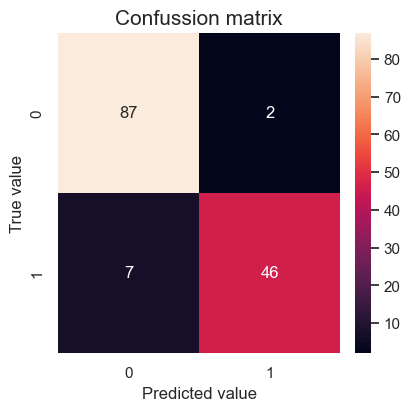

In [355]:
model_SVC = make_pipeline(
    SVC(C=1.0, # Default C parameter
        kernel='rbf', # gaussian basis function or Radial Basis Function
                      # polynomial kernel gives same results 
        random_state=42)
)

# 1. train the pipeline
model_SVC.fit(X_train, y_train)
# 2. predict 
y_pred = model_SVC.predict(X_test)
# 3. evaluation
print(classification_report(y_pred, y_test))
cv_svc = cross_val_score(model_SVC, X, y, cv=5, scoring='accuracy')
print(f"Cross Validation score: {cv_svc.mean()}")
# 4. graphic evaluation
fig, axs = plt.subplots(figsize=(4, 4), layout='constrained')
def cm_gbc_SVCrbf(ax, fontsize = 14):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('True value')
    ax.set_title('Confussion matrix', fontsize=fontsize+1)
cm_gbc_SVCrbf(axs)

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       111
           1       0.08      0.13      0.10        31

    accuracy                           0.46       142
   macro avg       0.39      0.34      0.36       142
weighted avg       0.56      0.46      0.51       142

Cross Validation score: 0.46370128861977955


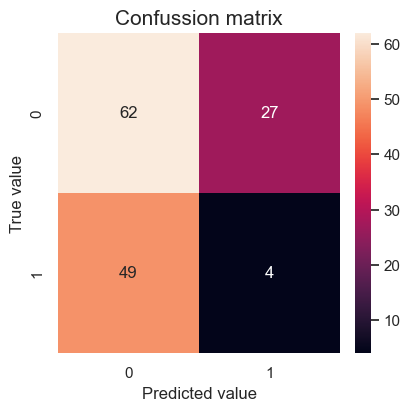

In [358]:
model_SVC_sig = make_pipeline(
    SVC(C=1.0, # Default C parameter
        kernel='sigmoid', # similarity between two data points is computed with tanh
        random_state=42)
)

# 1. train the pipeline
model_SVC_sig.fit(X_train, y_train)
# 2. predict 
y_pred = model_SVC_sig.predict(X_test)
# 3. evaluation
print(classification_report(y_pred, y_test))
# 4. graphic evaluation
fig, axs = plt.subplots(figsize=(4, 4), layout='constrained')
cv_svc_sig = cross_val_score(model_SVC_sig, X, y, cv=5, scoring='accuracy')
print(f"Cross Validation score: {cv_svc_sig.mean()}")
def cm_gbc_SVCsig(ax, fontsize = 14):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('True value')
    ax.set_title('Confussion matrix', fontsize=fontsize+1)
cm_gbc_SVCsig(axs)

Worst model to this data, because this kernel is very specific to data with a sigmoidal shape

#### $\nu$-SVM
Enter the parameter $\nu$ (nu), which controls:
    - The proportion of support vectors (points close to the hyperplane).
    - The proportion of classification errors.

Value $\nu$ is in range $[0,1]$:
    - Low value of $\nu$ allows a larger marg and less support vectors 
    - High value of $\nu$ forces a narrower margin and more support vectors

**Optimization**
$$ Minimize: \frac{1}{2}||\bold{w}||^{2}-\nu\rho+\frac{1}{n}\sum_{i=1}^{n}\xi_i $$
with: 
$$ y_i(\bold{w}\bold{x_i}+b) \geq \rho-\xi_i\;∀i \\[2mm]
\xi_i \geq 0,\; \rho \geq 0\;∀i
$$

- $\rho$: is the margin
- $\nu$: controls the proportion between erros and support vectors
NOTE: $\nu$ has a clearer interpretation, which facilitates the selection to reasonable values of $\nu$ 


              precision    recall  f1-score   support

           0       0.93      0.98      0.95        89
           1       0.96      0.87      0.91        53

    accuracy                           0.94       142
   macro avg       0.94      0.92      0.93       142
weighted avg       0.94      0.94      0.94       142

Cross Validation score: 0.9401024685607824


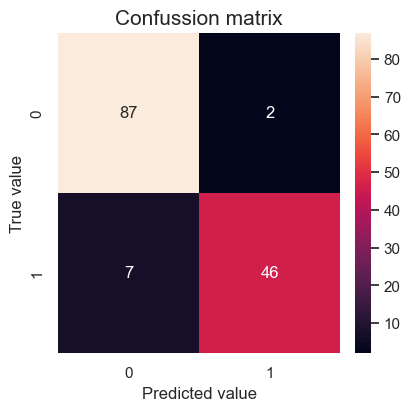

In [359]:
model_nuSVC = make_pipeline(
    StandardScaler(),
    NuSVC(kernel="rbf", nu=.5)
)

# 1. train the pipeline
model_SVC.fit(X_train, y_train)
# 2. predict
y_pred = model_SVC.predict(X_test)
# 3. evaluate
print(classification_report(y_test, y_pred))
cv_nusvc = cross_val_score(model_nuSVC, X, y, cv=5, scoring='accuracy')
print(f"Cross Validation score: {cv_nusvc.mean()}")
# 4. graphic evaluation
fig, axs = plt.subplots(figsize=(4, 4), layout='constrained')
def cm_gbc_nuSVC(ax, fontsize = 14):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('True value')
    ax.set_title('Confussion matrix', fontsize=fontsize+1)
cm_gbc_nuSVC(axs)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        53

    accuracy                           0.99       142
   macro avg       0.99      0.98      0.98       142
weighted avg       0.99      0.99      0.99       142

Cross Validation score: 0.9823785126533148


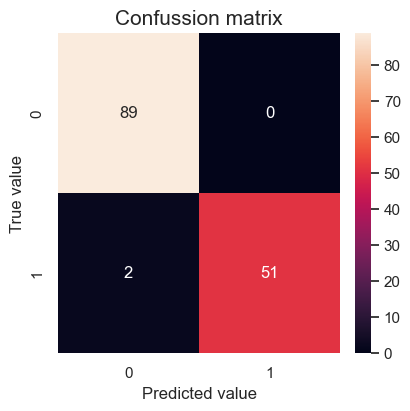

In [360]:
model_linearSVC = make_pipeline(
    StandardScaler(),
    LinearSVC(penalty='l2', C=2e-2,
              loss='squared_hinge', fit_intercept=False)
)

# 1. train the pipeline
model_linearSVC.fit(X_train, y_train)
# 2. predict
y_pred = model_linearSVC.predict(X_test)
# 3. evaluate
print(classification_report(y_test, y_pred))
cv_svc_lin = cross_val_score(model_linearSVC, X, y, cv=5, scoring='accuracy')
print(f"Cross Validation score: {cv_svc_lin.mean()}")
# 4. graphic evaluation
fig, axs = plt.subplots(figsize=(4, 4), layout='constrained')
def cm_gbc_linSVC(ax, fontsize = 14):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted value')
    ax.set_ylabel('True value')
    ax.set_title('Confussion matrix', fontsize=fontsize+1)
cm_gbc_linSVC(axs)

Use L1 penalization to get coef_ vectors that are sparse and the hinge is the standard SVM loss [SVC *class*](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#svc)

To check if the model is overfitting we can see the iteration on what iteration converged:

In [361]:
iter_converged = model_linearSVC.named_steps['linearsvc'].n_iter_
print(f"Linear Support Vector Machine converged at {iter_converged} iterations")

Linear Support Vector Machine converged at 7 iterations


### 4. Conclusion

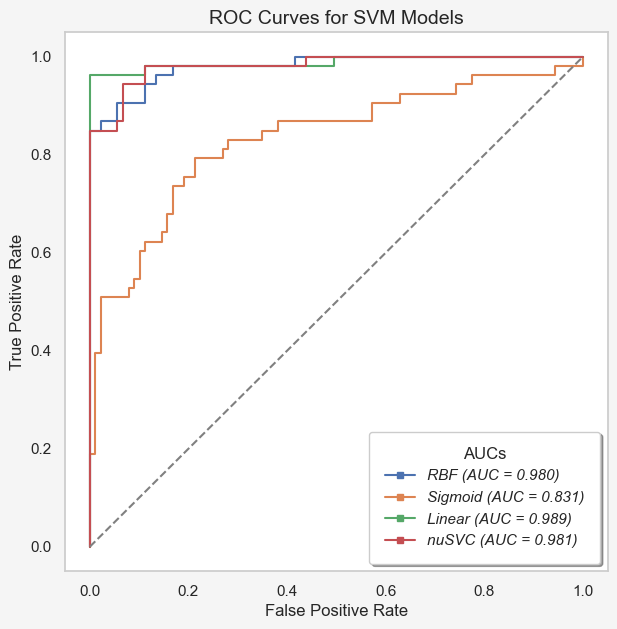

In [362]:
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.patches as mpatches


fig, ax = plt.subplots(figsize=(7, 7))
fig.patch.set_facecolor('whitesmoke')


# function to plot ROC curves
def SVM_curves(ax, model, label, fontsize = 14):
    if hasattr(model, 'predict_proba'): # hasattr verifies the existance of an attribute
        y_pred_proba = model.predict_proba(X_test)[:,1]
    else:
        # if the model do not have predict_proba(linearSVC), calibrate it
        cal_model = CalibratedClassifierCV(model)
        cal_model.fit(X_train, y_train)
        y_pred_proba = cal_model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    ax.plot(fpr, tpr, label=f'{label} (AUC = {auc:.3f})')

# models and labels list
models = [model_SVC, model_SVC_sig, model_linearSVC, model_nuSVC]
labels = ['RBF', 'Sigmoid', 'Linear', 'nuSVC']

for model, label in zip(models, labels): # zip for two or more iterables in a single object
    SVM_curves(ax, model, label)

ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.grid(False)

ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.set_title('ROC Curves for SVM Models', fontsize=14)
ax.legend(title= 'AUCs',prop={'style': 'italic'})

legend = ax.legend(title='AUCs', prop={'style': 'italic'},
                   fancybox=True, frameon=True, framealpha=1,
                   borderpad=1, shadow=True)

for handle in legend.legend_handles:
    handle.set_marker('s')  
    handle.set_markersize(5)  

plt.show()

RBF, Linear, and nu had a similar AUC, but the Linear SPM have the best True Positive Rate

In gradient boosting we have the attribute of class `staged_predict()` which predicts our `y target` by each `n_estimator`, because we are using a SVM we dont have this attribute, so we'll proceed that way:

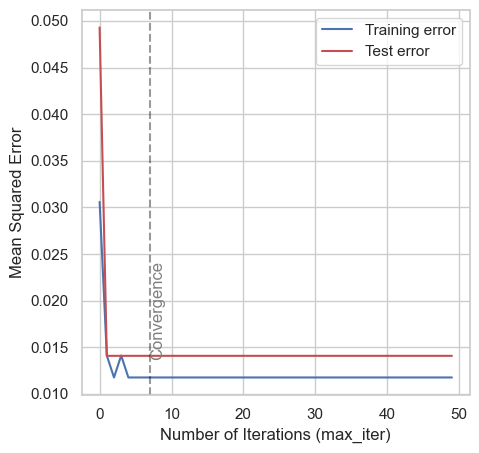

In [363]:
n_iterations = 50
train_errors = []
test_errors = []

import warnings
warnings.filterwarnings("ignore")

for i in range(1, n_iterations + 1):
    # best model to predict if is cancer, training with increasing max_uter
    model_linearSVC.set_params(linearsvc__max_iter=i)
    model_linearSVC.fit(X_train, y_train)

    # predictions for training and test sets
    y_train_pred = model_linearSVC.predict(X_train)
    y_test_pred = model_linearSVC.predict(X_test)

    # compute errors
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - y_test_pred)**2)

    # store errors
    train_errors.append(train_error)
    test_errors.append(test_error)

# plot results
plot_idx = np.arange(n_iterations)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(plot_idx, train_errors, 'b', label ='Training error')
ax.plot(plot_idx, test_errors, 'r', label ='Test error')
ax.axvline(x=iter_converged, color='black', linestyle='--', alpha=.4)
plt.text(iter_converged, 0.019, 'Convergence', rotation=90, color='gray', verticalalignment='center')
ax.legend()
ax.set_xlabel('Number of Iterations (max_iter)')
ax.set_ylabel('Mean Squared Error')
ax.grid(True)
plt.show()

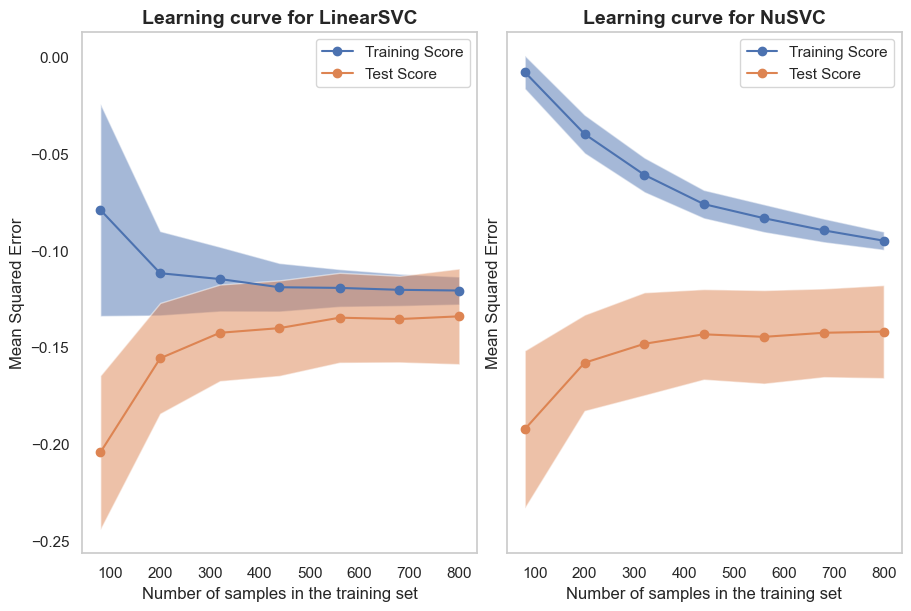

In [403]:
fig, ax = plt.subplots(1, 2, figsize=(9, 6), sharey=True, layout='constrained')

common_params = {
    "X":X,
    "y":y,
    "train_sizes": np.linspace(0.1, 1, 7),
    "scoring": 'neg_mean_squared_error', # defect is accuracy
    "cv": ShuffleSplit(n_splits=50, test_size=.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw":{"marker": 'o'},
    "std_display_style": 'fill_between',
    "score_name":'Mean Squared Error'
}

for ax_idx, estimator in enumerate([model_linearSVC, model_nuSVC]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label =ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].grid(False)
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning curve for {estimator[-1].__class__.__name__}",fontsize=14, fontweight='bold')